<a href="https://colab.research.google.com/github/jvaug30/Project-2/blob/main/Patient_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [238]:
df = pd.read_csv('/content/drive/MyDrive/00 Data/02 Stack Two/Week 08/Patient Survival.csv')
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [240]:
df = df.drop(columns=['encounter_id', 'patient_id', 'hospital_id', 'elective_surgery', 'pre_icu_los_days', 'icu_id', 'icu_stay_type', 'arf_apache', 'apache_post_operative', 'gcs_eyes_apache', 'gcs_motor_apache',
                      'gcs_unable_apache', 'gcs_verbal_apache', 'map_apache', 'icu_type', 'Unnamed: 83', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
                      'heart_rate_apache', 'intubated_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache'])

In [241]:
df.head(1)

,age,bmi,ethnicity,gender,height,icu_admit_source,weight,apache_2_diagnosis,apache_3j_diagnosis,d1_diasbp_max,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,Caucasian,M,180.3,Floor,73.9,113.0,502.01,68.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0


In [242]:
df.describe()

,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,...,d1_potassium_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,87485.000000,88284.000000,90379.000000,88993.000000,90051.000000,90612.000000,91548.000000,91548.000000,90673.000000,90673.000000,...,82128.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000
mean,62.309516,29.185818,169.641588,84.028340,185.401739,558.216377,88.491873,50.161314,88.610513,50.242597,...,3.934658,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,16.775119,8.275142,10.795378,25.011497,86.050882,463.266985,19.798379,13.317586,19.793743,13.341521,...,0.579610,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.280811
min,16.000000,14.844926,137.200000,38.600000,101.000000,0.010000,46.000000,13.000000,46.000000,13.000000,...,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,23.641975,162.500000,66.800000,113.000000,203.010000,75.000000,42.000000,75.000000,42.000000,...,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.654655,170.100000,80.300000,122.000000,409.020000,86.000000,50.000000,87.000000,50.000000,...,3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.930206,177.800000,97.100000,301.000000,703.030000,99.000000,58.000000,99.000000,58.000000,...,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,195.590000,186.000000,308.000000,2201.050000,165.000000,90.000000,165.000000,90.000000,...,5.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [243]:
df.duplicated().sum()

0

In [244]:
df.isna().any()

age                             True
bmi                             True
ethnicity                       True
gender                          True
height                          True
                               ...  
lymphoma                        True
solid_tumor_with_metastasis     True
apache_3j_bodysystem            True
apache_2_bodysystem             True
hospital_death                 False
Length: 62, dtype: bool

In [245]:
df['solid_tumor_with_metastasis'].isna().sum()

715

In [246]:
df['solid_tumor_with_metastasis'].unique()

array([ 0.,  1., nan])

In [247]:
mean_value_age = df[['age']].mean().round(0)
print(mean_value_age)
mean_value_bmi = df[['bmi']].mean().round(2)
print(mean_value_bmi)
mean_value_metastasis = df[['solid_tumor_with_metastasis']].mean().round(2)
print(mean_value_metastasis)

age    62.0
dtype: float64
bmi    29.19
dtype: float64
solid_tumor_with_metastasis    0.02
dtype: float64


In [248]:
median_value_metastasis = df[['solid_tumor_with_metastasis']].median()
print(median_value_metastasis)

solid_tumor_with_metastasis    0.0
dtype: float64


In [249]:
df.head(1)

,age,bmi,ethnicity,gender,height,icu_admit_source,weight,apache_2_diagnosis,apache_3j_diagnosis,d1_diasbp_max,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,Caucasian,M,180.3,Floor,73.9,113.0,502.01,68.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0


In [250]:
df['cirrhosis'].unique()

array([ 0.,  1., nan])

In [251]:
df['cirrhosis'].median()

0.0

In [252]:
df['cirrhosis'] = df['cirrhosis'].fillna(0.0)
df['cirrhosis'].unique()

array([0., 1.])

In [253]:
df['diabetes_mellitus'].unique()

array([ 1.,  0., nan])

In [254]:
df['diabetes_mellitus'].median()

0.0

In [255]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].fillna(0.0)
df['diabetes_mellitus'].unique()

array([1., 0.])

In [256]:
df['hepatic_failure'].unique()

array([ 0.,  1., nan])

In [257]:
df['hepatic_failure'].median()

0.0

In [258]:
df['hepatic_failure'] = df['hepatic_failure'].fillna(0.0)
df['hepatic_failure'].unique()

array([0., 1.])

In [259]:
df['immunosuppression'].unique()

array([ 0.,  1., nan])

In [260]:
df['immunosuppression'].median()

0.0

In [261]:
df['immunosuppression'] = df['immunosuppression'].fillna(0.0)
df['immunosuppression'].unique()

array([0., 1.])

In [262]:
df['leukemia'].unique()

array([ 0.,  1., nan])

In [263]:
df['leukemia'].median()

0.0

In [264]:
df['leukemia'] = df['leukemia'].fillna(0.0)
df['leukemia'].unique()

array([0., 1.])

In [265]:
df['lymphoma'].unique()

array([ 0., nan,  1.])

In [266]:
df['lymphoma'].median()

0.0

In [267]:
df['lymphoma'] = df['lymphoma'].fillna(0.0)
df['lymphoma'].unique()

array([0., 1.])

In [268]:
df[['age']] = df[['age']].fillna(df[['age']].mean().round(0))
df[['bmi']] = df[['bmi']].fillna(df[['bmi']].mean().round(2))

In [269]:
df[['solid_tumor_with_metastasis']] = df[['solid_tumor_with_metastasis']].fillna(df[['solid_tumor_with_metastasis']].median())

In [270]:
df['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

In [271]:
df['apache_3j_bodysystem'] = df['apache_3j_bodysystem'].fillna('Undefined Diagnoses')
df['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary',
       'Undefined Diagnoses', 'Hematological', 'Musculoskeletal/Skin',
       'Gynecological'], dtype=object)

In [272]:
df['apache_2_bodysystem'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary', nan,
       'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses'],
      dtype=object)

In [273]:
apache2_replace = {'Undefined diagnoses': 'Undefined Diagnoses'}
df['apache_2_bodysystem'] = df['apache_2_bodysystem'].replace(apache2_replace)
df['apache_2_bodysystem'] = df['apache_2_bodysystem'].fillna('Undefined Diagnoses')
df['apache_2_bodysystem'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary',
       'Undefined Diagnoses', 'Haematologic'], dtype=object)

In [292]:
df.isna().any()

age                            False
bmi                            False
ethnicity                       True
gender                         False
height                         False
                               ...  
lymphoma                       False
solid_tumor_with_metastasis    False
apache_3j_bodysystem           False
apache_2_bodysystem            False
hospital_death                 False
Length: 62, dtype: bool

In [293]:
df['gender'].unique()

array(['M', 'F', 'Unknown'], dtype=object)

In [294]:
df['ethnicity'].unique()

array(['Caucasian', nan, 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

In [295]:
df['ethnicity'] = df['ethnicity'].fillna('Other/Unknown')

In [275]:
df['height'] = df['height'].fillna(df['height'].mean()).round(1)

In [276]:
df['gender'] = df['gender'].fillna('Unknown')

In [296]:
df.isna().any()

age                            False
bmi                            False
ethnicity                      False
gender                         False
height                         False
                               ...  
lymphoma                       False
solid_tumor_with_metastasis    False
apache_3j_bodysystem           False
apache_2_bodysystem            False
hospital_death                 False
Length: 62, dtype: bool

In [278]:
df.describe()

,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,...,d1_potassium_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,91548.000000,91548.000000,90673.000000,90673.000000,...,82128.000000,90998.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,62.295247,29.185974,169.641041,84.028340,185.401739,558.216377,88.491873,50.161314,88.610513,50.242597,...,3.934658,0.000857,0.015570,0.223436,0.012888,0.025961,0.007011,0.004100,0.020477,0.086302
std,16.384012,8.118970,10.716683,25.011497,86.050882,463.266985,19.798379,13.317586,19.793743,13.341521,...,0.579610,0.029265,0.123806,0.416551,0.112792,0.159021,0.083438,0.063898,0.141626,0.280811
min,16.000000,14.844926,137.200000,38.600000,101.000000,0.010000,46.000000,13.000000,46.000000,13.000000,...,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,23.787760,162.600000,66.800000,113.000000,203.010000,75.000000,42.000000,75.000000,42.000000,...,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,28.007812,170.000000,80.300000,122.000000,409.020000,86.000000,50.000000,87.000000,50.000000,...,3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.653061,177.800000,97.100000,301.000000,703.030000,99.000000,58.000000,99.000000,58.000000,...,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,195.600000,186.000000,308.000000,2201.050000,165.000000,90.000000,165.000000,90.000000,...,5.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


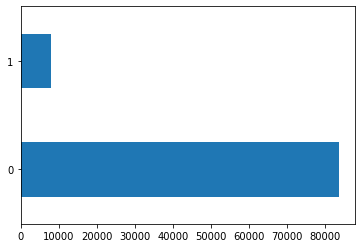

In [279]:
df['hospital_death'].value_counts().plot(kind='barh');

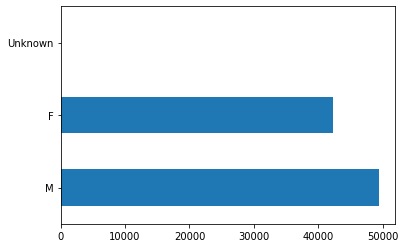

In [297]:
df['gender'].value_counts().plot(kind='barh');

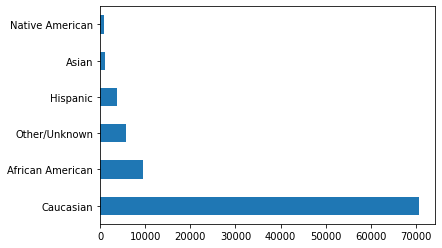

In [298]:
df['ethnicity'].value_counts().plot(kind='barh');

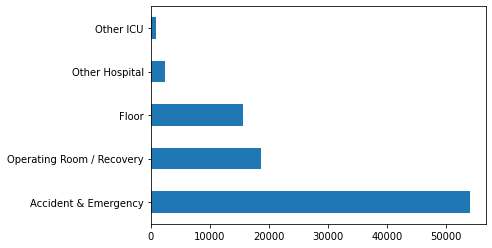

In [282]:
df['icu_admit_source'].value_counts().plot(kind='barh');

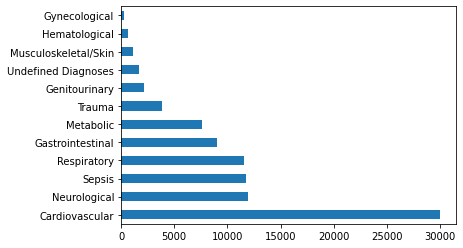

In [283]:
df['apache_3j_bodysystem'].value_counts().plot(kind='barh');

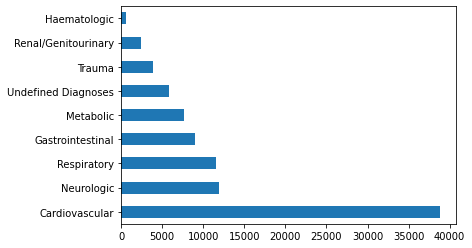

In [284]:
df['apache_2_bodysystem'].value_counts().plot(kind='barh');

In [285]:
df.head(1)

,age,bmi,ethnicity,gender,height,icu_admit_source,weight,apache_2_diagnosis,apache_3j_diagnosis,d1_diasbp_max,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,Caucasian,M,180.3,Floor,73.9,113.0,502.01,68.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0


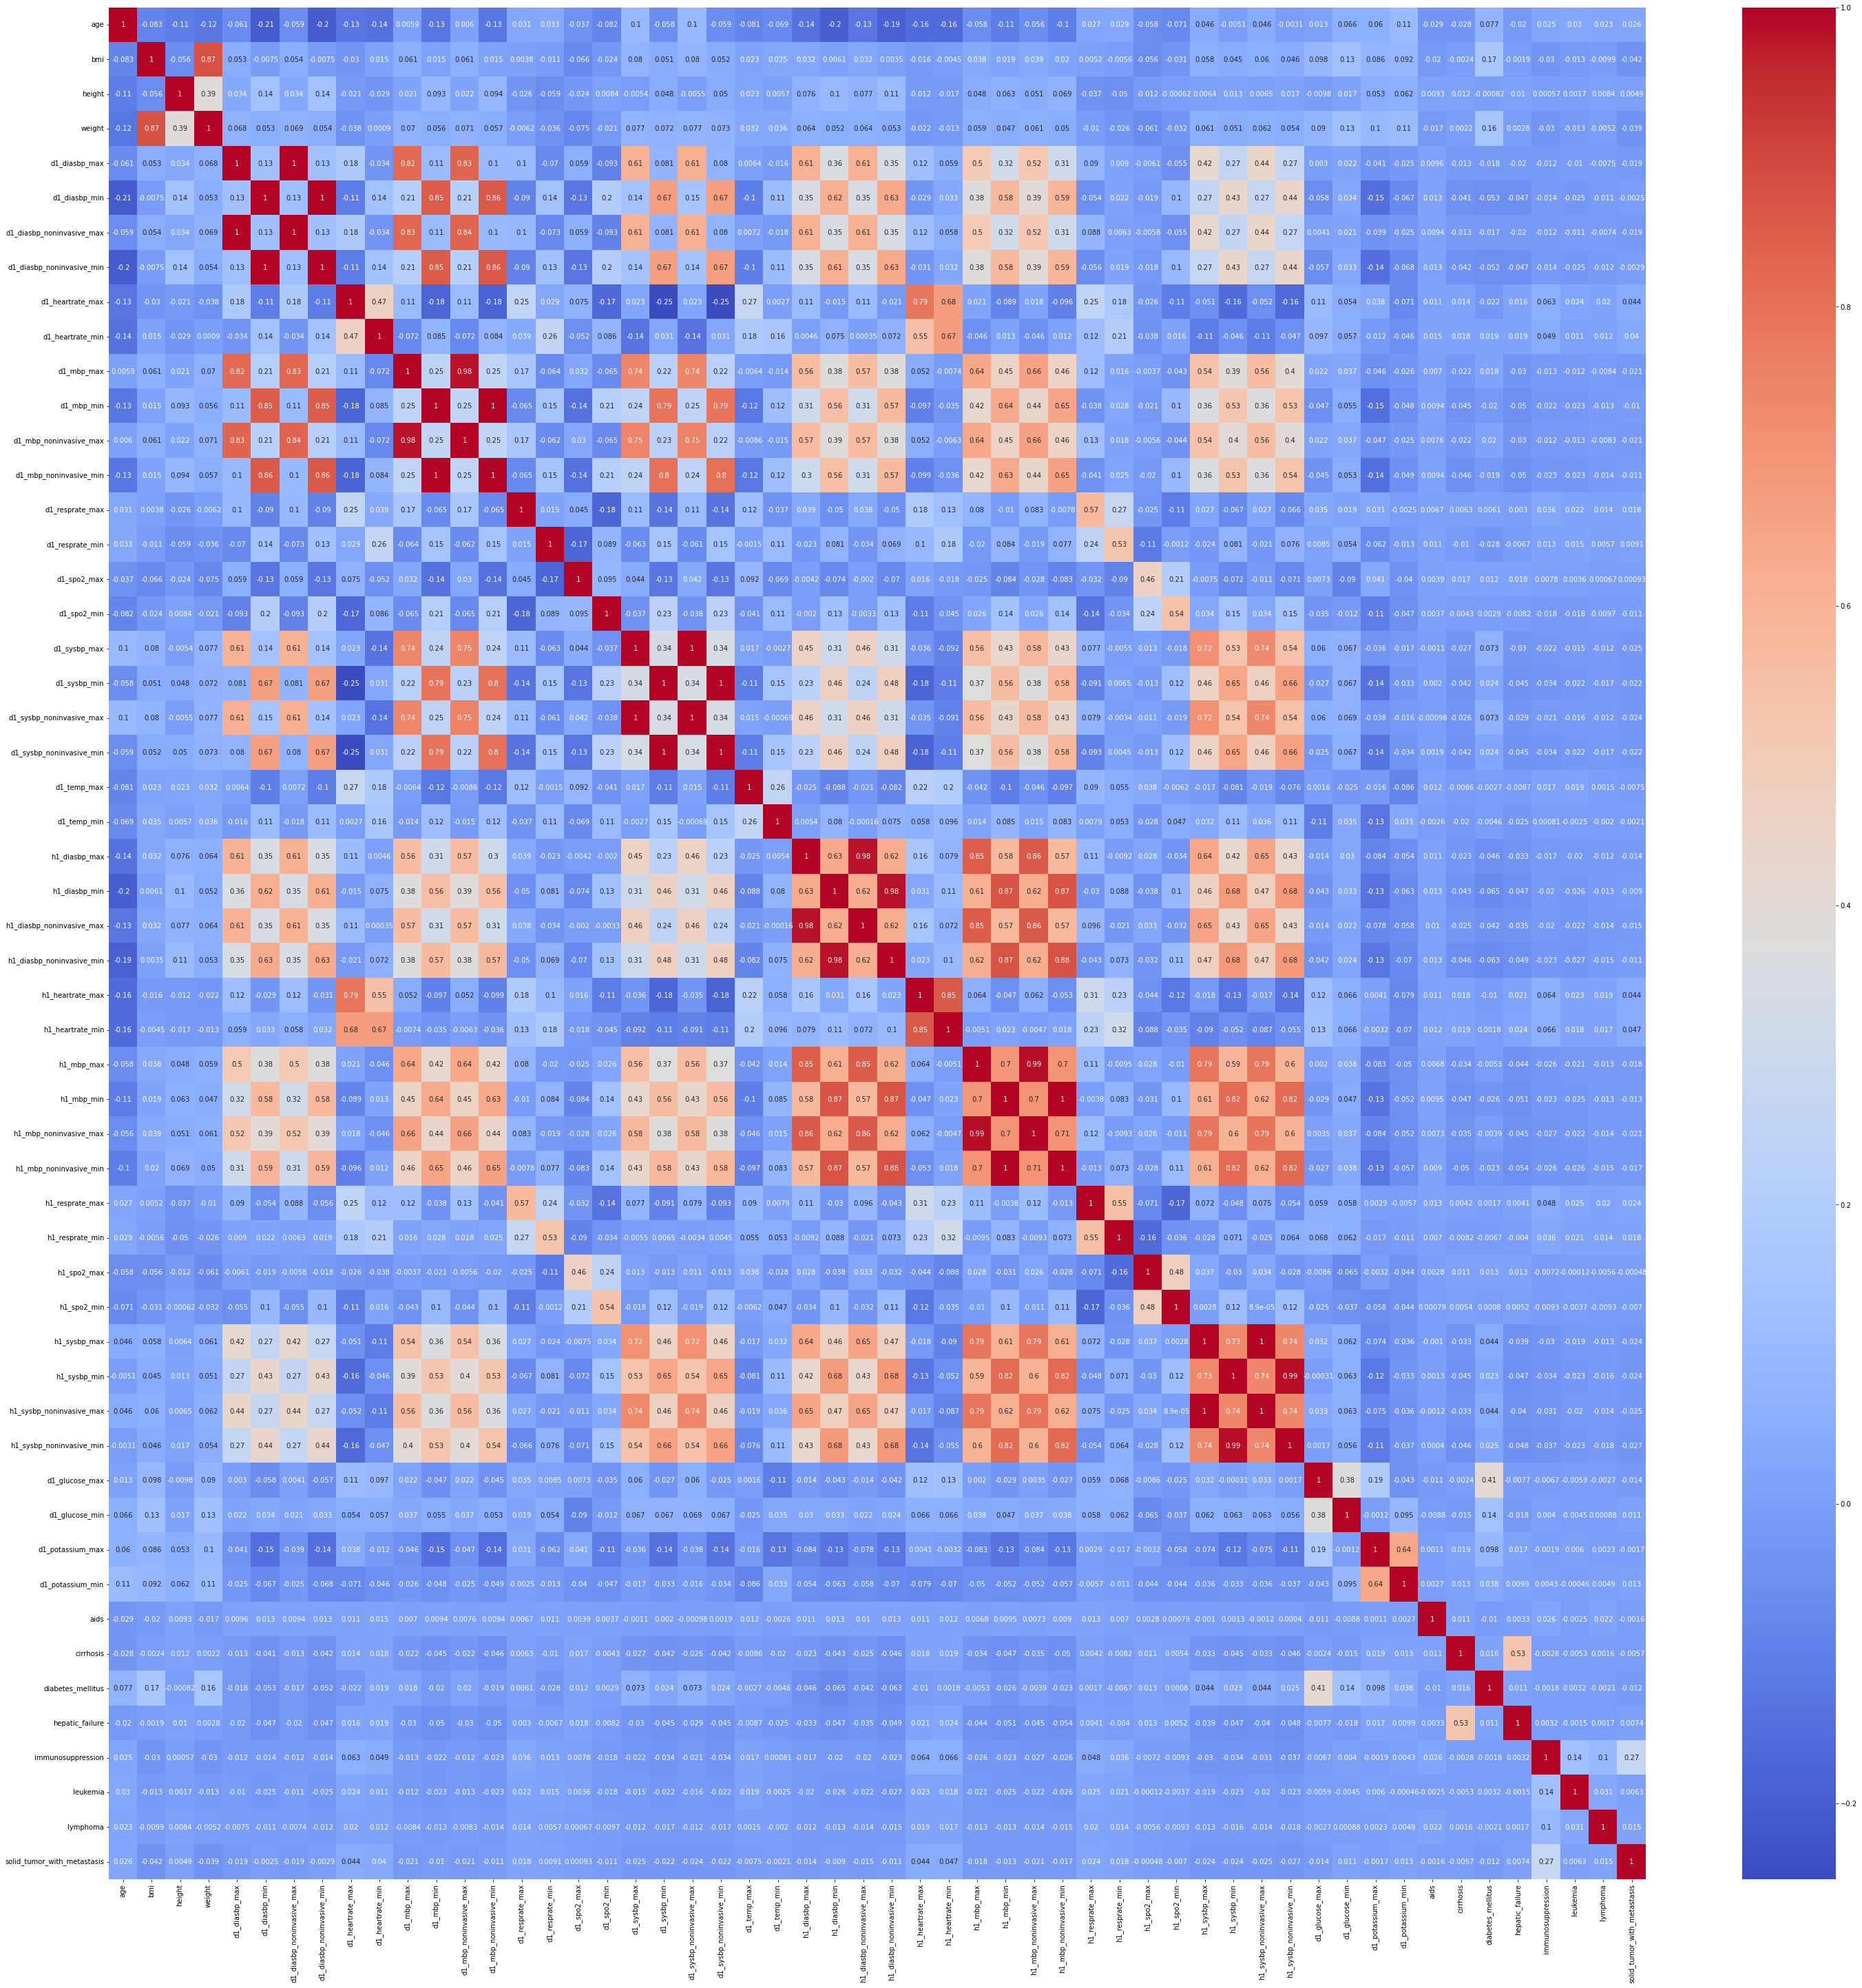

In [286]:
corr = df.drop(columns=['apache_2_bodysystem', 'apache_3j_bodysystem', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'icu_admit_source', 'ethnicity', 'hospital_death']).corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr, cmap='coolwarm', annot=True);

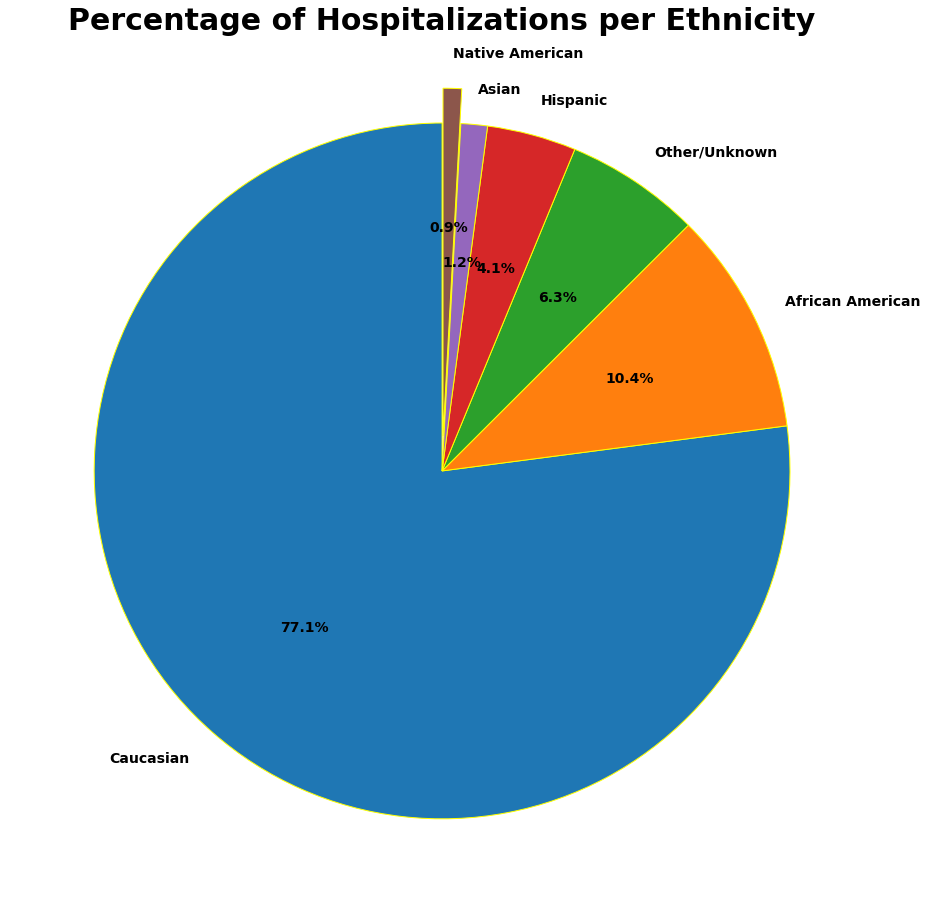

In [299]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
# https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# https://www.geeksforgeeks.org/how-to-use-color-palettes-in-python-bokeh/

df_ethnicity = ['Caucasian', 'African American', 'Other/Unknown', 'Hispanic', 'Asian', 'Native American']

pct = df['ethnicity'].value_counts()
pct
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.1)
wp = {'linewidth' : 1, 'edgecolor' : 'yellow',}
def func(pct):
  absolute = int(pct)
  return '{:.1f}%'.format(pct, absolute)
fig, axes = plt.subplots(figsize=(20,16))
axes.pie(pct,
         autopct = lambda pct: func(pct),
         explode = explode,
         labels = df_ethnicity,
         shadow = False,
         startangle=90,
         wedgeprops = wp,
         textprops = dict(color ='k', weight= 'bold', fontsize=14));
axes.set_title('Percentage of Hospitalizations per Ethnicity', weight = 'bold', fontsize = 30);

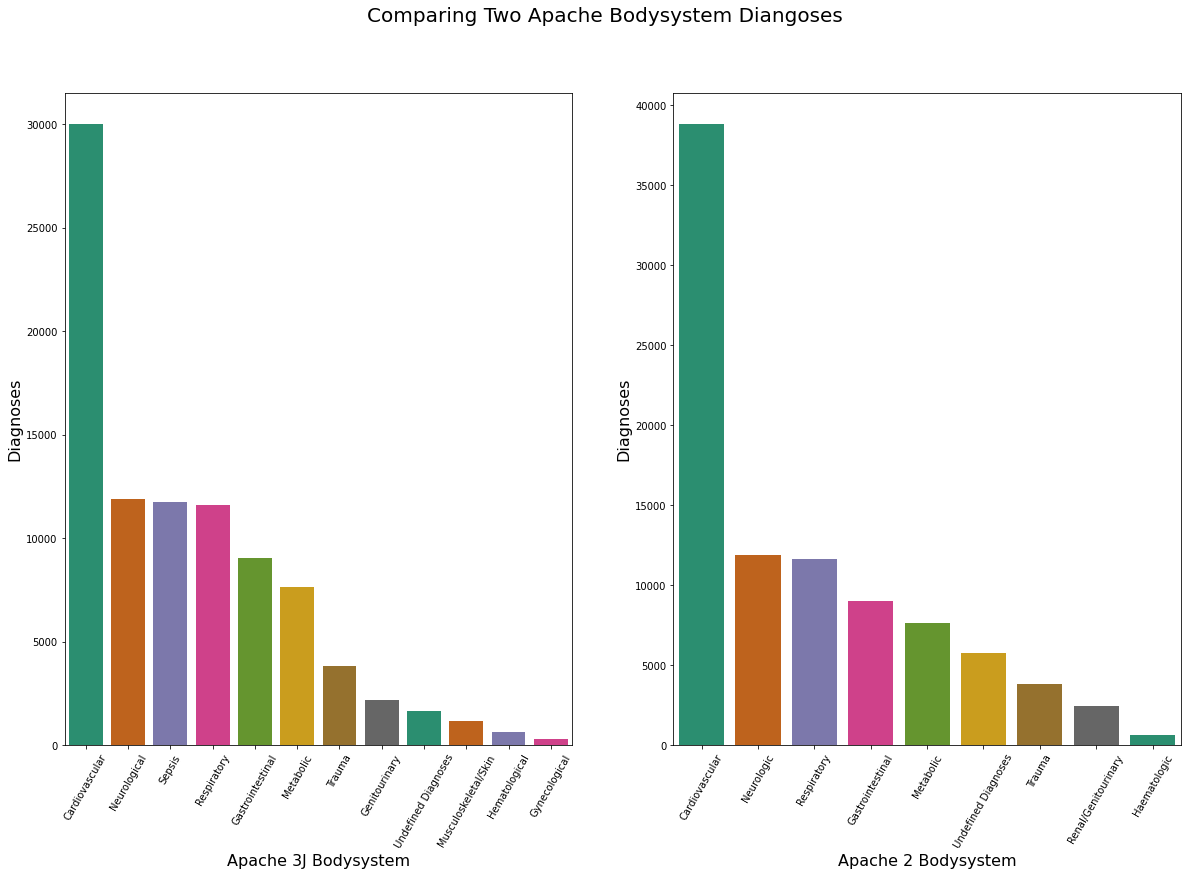

In [300]:
fig, axes = plt.subplots(ncols=2, figsize=(20,12))
axes[0] = sns.barplot(data=df, x=['Cardiovascular', 'Neurological', 'Sepsis', 'Respiratory', 'Gastrointestinal', 'Metabolic',
                                  'Trauma', 'Genitourinary', 'Undefined Diagnoses', 'Musculoskeletal/Skin',
                                  'Hematological', 'Gynecological'],
                      y=[29999, 11896, 11740, 11609, 9026, 7650,
                         3842, 2172, 1662, 1166, 638, 313], ax=axes[0], palette='Dark2');
plt.setp(axes[0].get_xticklabels(), rotation=60)
axes[0].set_xlabel('Apache 3J Bodysystem', fontsize=16)
axes[0].set_ylabel('Diagnoses', fontsize=16)
sns.barplot(data=df, x=['Cardiovascular', 'Neurologic', 'Respiratory', 'Gastrointestinal',
                        'Metabolic', 'Undefined Diagnoses', 'Trauma',
                        'Renal/Genitourinary', 'Haematologic'],
            y=[38816, 11896, 11609, 9026, 7650, 5776, 3842, 2460, 638], ax=axes[1], palette='Dark2');
plt.setp(axes[1].get_xticklabels(), rotation=60)
axes[1].set_xlabel('Apache 2 Bodysystem', fontsize=16)
axes[1].set_ylabel('Diagnoses', fontsize=16)
fig.suptitle('Comparing Two Apache Bodysystem Diangoses', fontsize=20);

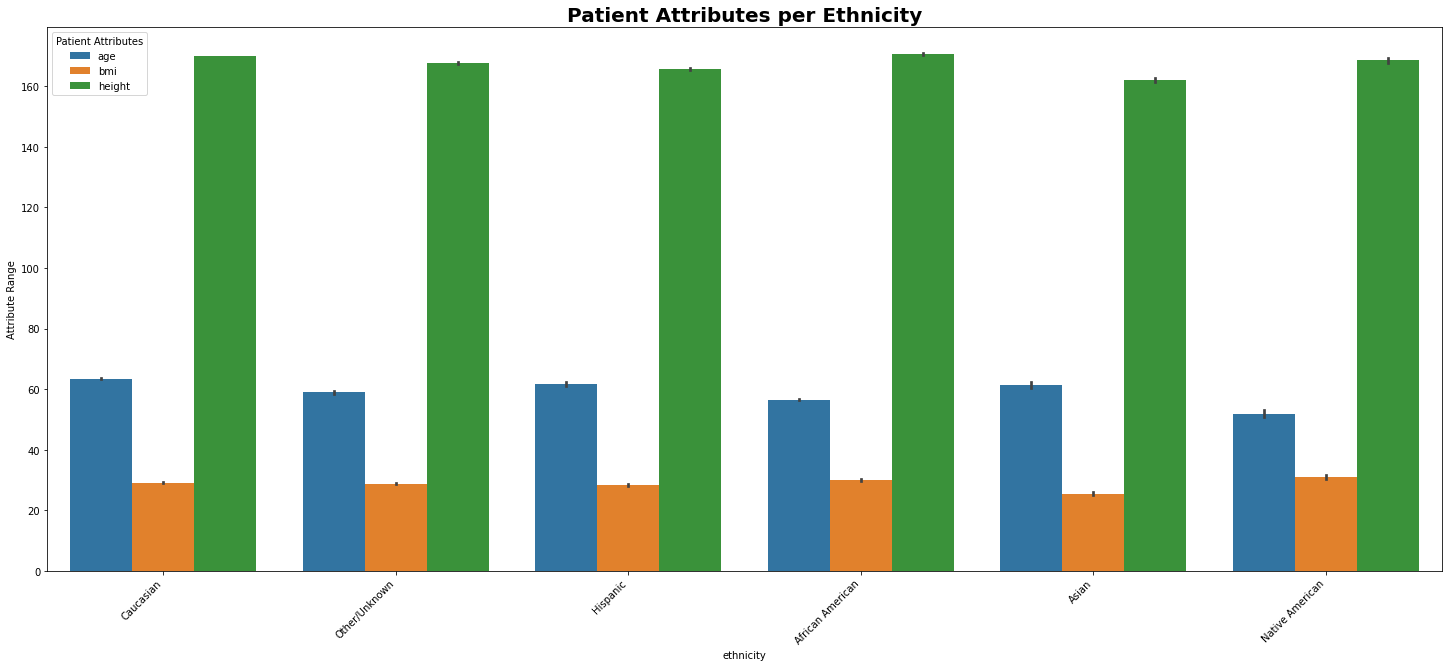

In [301]:
plot_bar_ethnicity = pd.melt(df, id_vars=['ethnicity'], value_vars=['age', 'bmi', 'height'],
                             var_name='Patient Attributes', value_name='Attribute Range')

plt.figure(figsize=(25, 10))
axes = sns.barplot(data=plot_bar_ethnicity, x='ethnicity', y='Attribute Range', hue='Patient Attributes')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
axes.set_title('Patient Attributes per Ethnicity', weight='bold', fontsize=20);

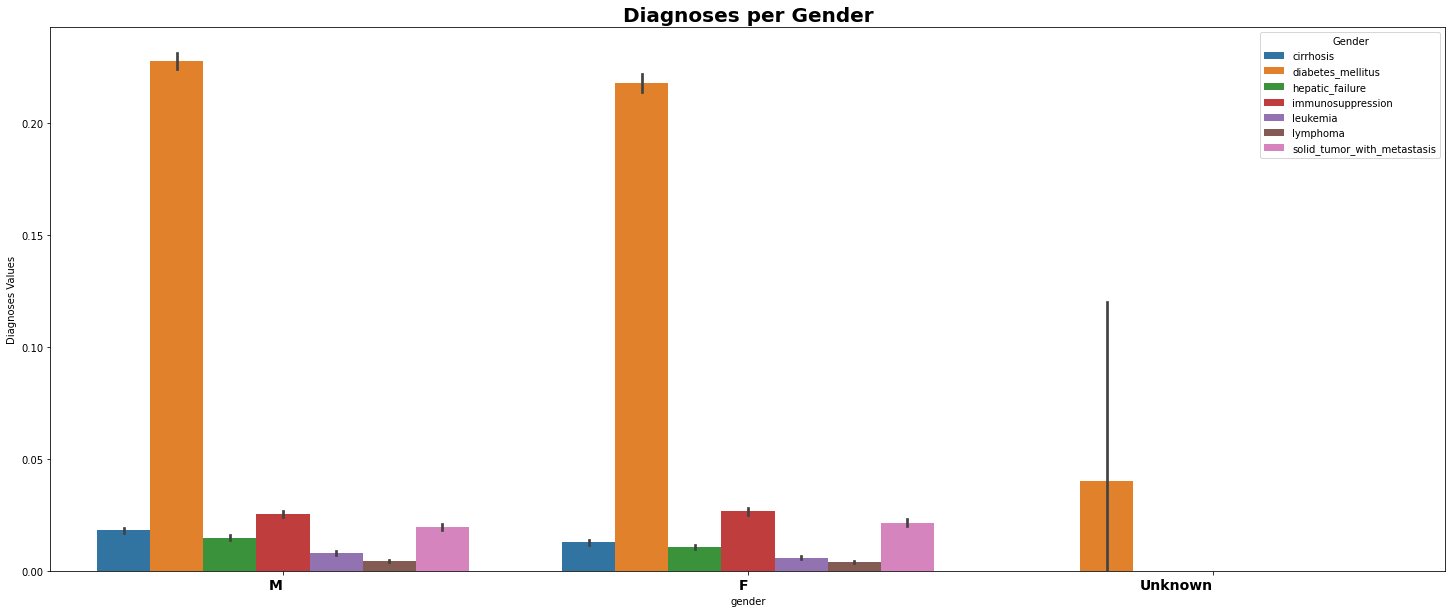

In [302]:
plot_bar_ethnicity = pd.melt(df, id_vars=['gender'], value_vars=['cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression',
                                                                 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis'],
                             var_name='Gender', value_name='Diagnoses Values')

plt.figure(figsize=(25, 10))
axes = sns.barplot(data=plot_bar_ethnicity, x='gender', y='Diagnoses Values', hue='Gender')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0, weight='bold', fontsize=14, ha='right')
axes.set_title('Diagnoses per Gender', weight='bold', fontsize=20);